<a href="https://colab.research.google.com/github/Nasthl/macnine-learning-/blob/main/%5BCOLAB%5D_Copy_of_puste_Zaj%C4%99cia_5_Zadania_sieci_neuronowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense


def plot_decision_boundary(model, X, y):
    # Przygotowanie siatki punktów w zakresie danych wejściowych
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Wykonanie predykcji dla siatki punktów
    y_pred = model.predict(grid_points)

    # Przekształcenie wyników predykcji do pierwotnego kształtu siatki
    # Wykonanie predykcji dla siatki punktów
    # @TODO poprawa dla sigmoid
    y_pred = model.predict(grid_points)
    y_pred = np.argmax(y_pred, axis=1)

    # Przekształcenie wyników predykcji do pierwotnego kształtu siatki
    y_pred = y_pred.reshape(xx.shape)

    # Wyświetlenie wykresu z liniami decyzyjnymi
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.title('Decision Boundary')
    plt.show()

n_samples = 500
n_classes = 2
noise = 0.1
angle = 45



## Zadanie:
Twoim zadaniem jest przeprowadzenie eksperymentów w aplikacji Playground TensorFlow, aby lepiej zrozumieć wpływ różnych czynników na działanie sieci neuronowych. Skoncentruj się na eksperymentowaniu z różnymi zbiorami danych, architekturą sieci neuronowej, współczynnikiem uczenia (learning rate) oraz funkcją aktywacji.

Opis zadania:
1. Otwórz aplikację Playground TensorFlow, dostępną pod adresem: https://playground.tensorflow.org/.
2. Eksperymentuj ze zbiorami danych:
   - Wybierz różne rodzaje zbiorów danych dostępnych w aplikacji, takie jak separowalne liniowo, spiralne, wykluczające XOR itp.
   - Zobacz, jak różne typy danych wpływają na działanie sieci neuronowej.
3. Eksperymentuj z architekturą sieci neuronowej:
   - Zmień liczbę warstw sieci neuronowej.
   - Zmień liczbę neuronów w poszczególnych warstwach.
   - Dodaj lub usuń warstwy w modelu sieci neuronowej.
4. Eksperymentuj z współczynnikiem uczenia (learning rate):
   - Zmień wartość współczynnika uczenia i obserwuj, jak wpływa to na proces uczenia.
   - Zwróć uwagę na tempo zbieżności i stabilność uczenia dla różnych wartości.
5. Eksperymentuj z funkcją aktywacji:
   - Zmień funkcję aktywacji w poszczególnych warstwach.
   - Wypróbuj różne funkcje aktywacji, takie jak sigmoidalna, ReLU, tanh itp.
   - Zauważ, jak różne funkcje aktywacji wpływają na działanie sieci neuronowej i proces uczenia.

Celem tego zadania jest eksperymentowanie i obserwowanie, jak różne czynniki wpływają na zachowanie sieci neuronowej. Staraj się zrozumieć, jak zmiany w zbiorach danych, architekturze sieci, współczynniku uczenia i funkcji aktywacji wpływają na wydajność i efektywność sieci neuronowej w Kerasie.

Po przeprowadzeniu eksperymentów, zastanów się nad wnioskami i spostrzeżeniami dotyczącymi różnych ustawień. Zrozumienie wpływu tych czynników pomoże Ci w dalszym rozwijaniu umiejętności w dziedzinie sieci neuronowych i zoptymalizowaniu swoich modeli w Kerasie.

1. Otwórz aplikację Playground TensorFlow, dostępną pod adresem: https://playground.tensorflow.org/.

2. Eksperymentuj ze zbiorami danych:
   - Wybierz różne rodzaje zbiorów danych dostępnych w aplikacji, takie jak separowalne liniowo, spiralne, wykluczające XOR itp.
   - Zobacz, jak różne typy danych wpływają na działanie sieci neuronowej.

In [ ]:
# Jakie dane:Circle

3. Eksperymentuj z architekturą sieci neuronowej:
   - Zmień liczbę warstw sieci neuronowej.
   - Zmień liczbę neuronów w poszczególnych warstwach.
   - Dodaj lub usuń warstwy w modelu sieci neuronowej.

In [ ]:
# ile_warst =2

4. Eksperymentuj z współczynnikiem uczenia (learning rate):
   - Zmień wartość współczynnika uczenia i obserwuj, jak wpływa to na proces uczenia.

In [ ]:
# best_lr =0,3

5. Eksperymentuj z funkcją aktywacji:
   - Zmień funkcję aktywacji w poszczególnych warstwach.
   - Wypróbuj różne funkcje aktywacji, takie jak sigmoidalna, ReLU, tanh itp.
   - Zauważ, jak różne funkcje aktywacji wpływają na działanie sieci neuronowej i proces uczenia.

In [ ]:
#Tanh

### Zadanie zbioru danych "Circles"

W ramach tego zadania, Twoim zadaniem jest przygotowanie algorytmu klasyfikacji opartego na sieci neuronowej. Podpowiedzia w odpowiednim doborze algorytmu jest zadanie poprzednie. Algorytm ten będzie wykorzystywał model sieci neuronowej o jednej warstwie gęstej (Dense) z dwoma wyjściami, aktywowanymi funkcją sigmoidalną.

Aby zrealizować to zadanie, wykonaj poniższe kroki:

1. Wygeneruj zbiór danych do klasyfikacji. Skorzystać z funkcji `datasets.make_circles` z odpowiednimi parametrami, takimi jak `n_samples`, `factor` i `noise`.

2. Podziel zbiór danych na zbiór treningowy i testowy przy użyciu funkcji `train_test_split` z biblioteki `sklearn.model_selection`.

3. Stwórz model sieci neuronowej wykorzystującej `Sequential` z biblioteki `tensorflow.keras.models`. Dodaj warstwę gęstą (`Dense`) z dwoma wyjściami i aktywacją softmax.

4. Skompiluj model, używając jako funkcji straty `categorical_crossentropy` i jako optymalizatora `Adam`. Dodaj również metrykę `accuracy` do oceny wydajności modelu.

5. Trenuj model na zbiorze treningowym przez określoną liczbę epok, używając funkcji `fit`. Ustal rozmiar partii (batch size) na 10 i opcjonalnie możesz dodać podział walidacyjny (`validation_split=0.2`), aby monitorować wydajność modelu na zbiorze walidacyjnym.

6. Ewaluuj model na zbiorze testowym przy użyciu funkcji `evaluate` i oblicz wartości straty (`loss`) oraz dokładności (`accuracy`).

7. Wyżej jest zdefiniowana funkcja plot_decision_boundary(model, X, y), która wyświetli granice decyzyjne modelu na wykresie. Funkcja ta przyjmuje trzy argumenty: model (wytrenowany model sieci neuronowej), X (zbiór danych wejściowych) i y (etykiety klas). Funkcja wygneruej siatkę punktów na podstawie zakresu danych wejściowych $X$, a następnie przewidzi etykiety dla każdego punktu na siatce przy użyciu modelu. Na koniec, funkcja powinna narysować wykres, na którym punkty danych są kolorowane na podstawie ich rzeczywistych etykiet klas, a granice decyzyjne są wizualizowane jako kontury lub tło z różnymi kolorami dla różnych klas.


Wykonując te kroki, będziesz miał przygotowany algorytm klasyfikacji oparty na sieci neuronowej. Pamiętaj o dostosowaniu parametrów oraz optymalizacji modelu, aby uzyskać jak najlepsze wyniki klasyfikacji.

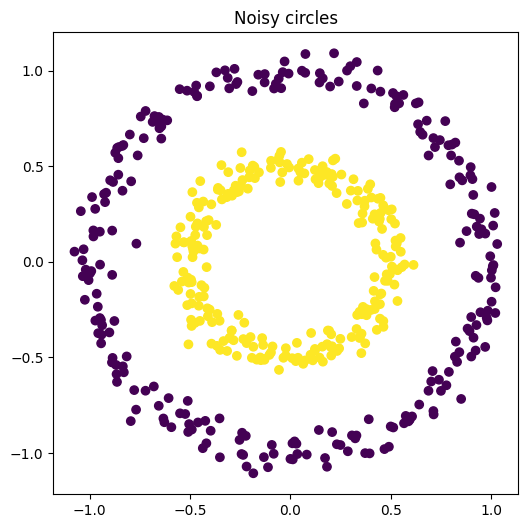

In [ ]:
from sklearn import datasets

# Generowanie zbioru danych "Circles"
n_samples = 500
factor = 0.5
noise = 0.05
X, y = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)

#wizualizacja danych
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Noisy circles')
plt.show()


1. Wygeneruj zbiór danych do klasyfikacji. Skorzystać z funkcji `datasets.make_circles` z odpowiednimi parametrami, takimi jak `n_samples`, `factor` i `noise`.


In [ ]:
X, y = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)
y_2=y.copy()

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)


2. Podziel zbiór danych na zbiór treningowy i testowy przy użyciu funkcji `train_test_split` z biblioteki `sklearn.model_selection`.


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)


3. Stwórz model sieci neuronowej wykorzystującej `Sequential` z biblioteki `tensorflow.keras.models`. Dodaj warstwę gęstą (`Dense`) z dwoma wyjściami i aktywacją softmax.


In [ ]:
model=Sequential()
model.add(Dense(6,input_shape=(2,), activation='tanh'))

model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='softmax'))


4. Skompiluj model, używając jako funkcji straty `categorical_crossentropy` i jako optymalizatora `Adam`. Dodaj również metrykę `accuracy` do oceny wydajności modelu.


In [ ]:
from keras.optimizers import Adam
model.compile(metrics='accuracy', loss='categorical_crossentropy',optimizer=Adam())


5. Trenuj model na zbiorze treningowym przez określoną liczbę epok, używając funkcji `fit`. Ustal rozmiar partii (batch size) na 10 i opcjonalnie możesz dodać podział walidacyjny (`validation_split=0.2`), aby monitorować wydajność modelu na zbiorze walidacyjnym.


In [ ]:
model.fit(X_train ,y_train, epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5200
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5500
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5475
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.6075
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.6300
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6875
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6800
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.7000
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6950
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6625
Epoch 11/


6. Ewaluuj model na zbiorze testowym przy użyciu funkcji `evaluate` i oblicz wartości straty (`loss`) oraz dokładności (`accuracy`).


In [ ]:
score=model.evaluate(X_test,y_test, verbose=1)

4/4 [==============================] - 0s 4ms/step - loss: 0.1096 - accuracy: 1.0000



7. Wyżej jest zdefiniowana funkcja plot_decision_boundary(model, X, y), która wyświetli granice decyzyjne modelu na wykresie. Funkcja ta przyjmuje trzy argumenty: model (wytrenowany model sieci neuronowej), X (zbiór danych wejściowych) i y (etykiety klas). Funkcja wygneruej siatkę punktów na podstawie zakresu danych wejściowych $X$, a następnie przewidzi etykiety dla każdego punktu na siatce przy użyciu modelu. Na koniec, funkcja powinna narysować wykres, na którym punkty danych są kolorowane na podstawie ich rzeczywistych etykiet klas, a granice decyzyjne są wizualizowane jako kontury lub tło z różnymi kolorami dla różnych klas.


1800/1800 [==============================] - 3s 1ms/step


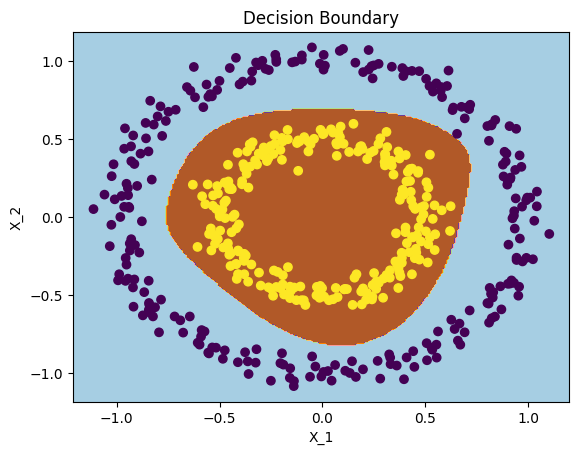

In [ ]:
plot_decision_boundary(model,X,y_2)

### Zadanie zbioru danych "Noisy Moons"

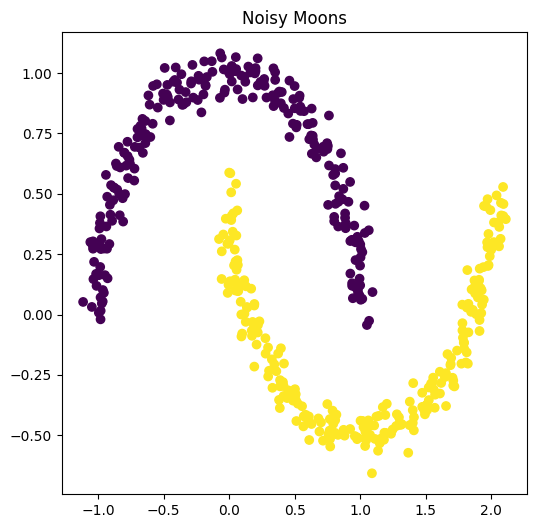

In [ ]:
# Generowanie zbioru danych "Noisy Moons"
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X_moons, y_moons = noisy_moons

plt.figure(figsize=(6, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis')
plt.title('Noisy Moons')
plt.show()



Aby zrealizować to zadanie, wykonaj poniższe kroki:

1. Wygeneruj zbiór danych do klasyfikacji. Skorzystaj z funkcji `datasets.make_moons` z odpowiednimi parametrami, takimi jak `n_samples` i `noise`.

2. Podziel zbiór danych na zbiór treningowy i testowy przy użyciu funkcji `train_test_split` z biblioteki `sklearn.model_selection`.


3. Stwórz model sieci neuronowej wykorzystującej `Sequential` z biblioteki `tensorflow.keras.models`. Dodaj warstwę gęstą (`Dense`) z dwoma wyjściami i aktywacją sigmoidalną.

4. Skompiluj model, używając jako funkcji straty `categorical_crossentropy` i jako optymalizatora `Adam`. Dodaj również metrykę `accuracy` do oceny wydajności modelu.

6. Trenuj model na zbiorze treningowym przez określoną liczbę epok, używając funkcji `fit`. Ustal rozmiar partii (batch size) na 1 i opcjonalnie możesz dodać podział walidacyjny (`validation_split`), aby monitorować wydajność modelu na zbiorze walidacyjnym.

7. Ewaluuj model na zbiorze testowym przy użyciu funkcji `evaluate` i oblicz wartości straty (`loss`) oraz dokładności (`accuracy`).

8. Wyżej jest zdefiniowana funkcja plot_decision_boundary(model, X, y), która wyświetli granice decyzyjne modelu na wykresie. Funkcja ta przyjmuje trzy argumenty: model (wytrenowany model sieci neuronowej), X (zbiór danych wejściowych) i y (etykiety klas). Funkcja wygneruej siatkę punktów na podstawie zakresu danych wejściowych $X$, a następnie przewidzi etykiety dla każdego punktu na siatce przy użyciu modelu. Na koniec, funkcja powinna narysować wykres, na którym punkty danych są kolorowane na podstawie ich rzeczywistych etykiet klas, a granice decyzyjne są wizualizowane jako kontury lub tło z różnymi kolorami dla różnych klas.

Wykonując te kroki, będziesz miał przygotowany algorytm klasyfikacji oparty na sieci neuronowej. Pamiętaj o dostosowaniu parametrów oraz optymalizacji modelu, aby uzyskać jak najlepsze wyniki klasyfikacji.

Wygeneruj zbiór danych do klasyfikacji. Skorzystaj z funkcji `datasets.make_moons` z odpowiednimi parametrami, takimi jak `n_samples` i `noise`

In [ ]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X_moons, y_moons = noisy_moons
y_moons_2=y_moons.copy()
y_moons=to_categorical(y_moons)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_moons, y_moons, test_size=0.2)

In [ ]:
model_moons=Sequential()
model_moons.add(Dense(6,input_shape=(2,), activation='tanh'))
model_moons.add(Dense(8, activation='tanh'))
model_moons.add(Dense(2, activation='sigmoid'))
model_moons.compile(metrics='accuracy', loss='categorical_crossentropy',optimizer=Adam())

In [ ]:
model_moons.fit(X_train,y_train, batch_size=10, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 16ms/step - loss: 0.2299 - accuracy: 0.8925 - val_loss: 0.2995 - val_accuracy: 0.8300
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.2292 - accuracy: 0.8900 - val_loss: 0.2992 - val_accuracy: 0.8300
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.8925 - val_loss: 0.2949 - val_accuracy: 0.8300
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.8900 - val_loss: 0.2970 - val_accuracy: 0.8300
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.8900 - val_loss: 0.2948 - val_accuracy: 0.8300
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.8925 - val_loss: 0.2979 - val_accuracy: 0.8300
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.8925 - val_loss: 0.2953 - val_accuracy: 0.8300
Epoch 8/200


2040/2040 [==============================] - 4s 2ms/step


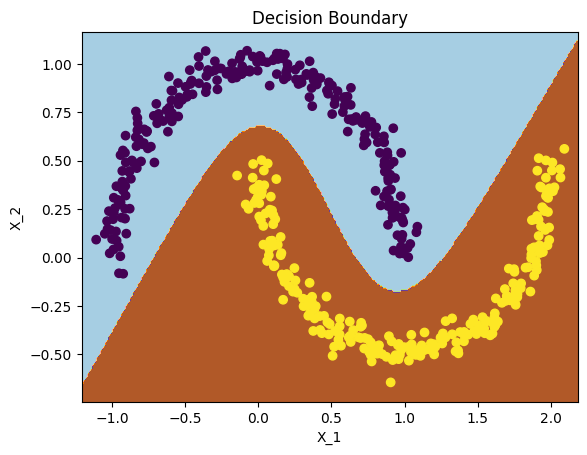

In [ ]:
plot_decision_boundary(model_moons, X_moons, y_moons_2)

In [ ]:
y_moons_2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

### Regresja dla datasetu INCOME

Zadanie regresji z wykorzystaniem modelu sieci neuronowej dla zbioru danych dotyczących informacji o różnych krajach:

1. Wczytaj zbiór danych, który zawiera informacje o krajach, takie jak GDP per capita, średnia długość życia, liczba ludności i kontynent.

2. Przygotuj zbiór treningowy i testowy, podzielając dane na odpowiednie podzbiory. Możesz wykorzystać funkcję `train_test_split` z biblioteki `sklearn.model_selection`. Przygotuj standaryzacje zmiennych.

3. Stwórz model sieci neuronowej za pomocą biblioteki `tensorflow.keras.models`. Wybierz odpowiednią architekturę sieci, uwzględniając liczby wejść i wyjść, a także odpowiednie funkcje aktywacji dla warstw pośrednich.

4. Skompiluj model, używając odpowiedniej funkcji straty i optymalizatora. W przypadku regresji, popularne funkcje straty to np. `mean_squared_error` lub `mean_absolute_error`, a optymalizatory to np. `Adam` lub `SGD`. Dodaj również metrykę, taką jak `mean_absolute_error` lub `mean_squared_error`, aby ocenić wydajność modelu.

5. Trenuj model na zbiorze treningowym przez określoną liczbę epok, używając funkcji `fit`. Monitoruj postęp modelu na zbiorze walidacyjnym, aby ocenić jego wydajność i uniknąć przeuczenia.

6. Ewaluuj model na zbiorze testowym, używając funkcji `evaluate`. Sprawdź wartość funkcji straty i ewentualnie inne metryki, aby ocenić, jak dobrze model generalizuje na nowych danych.

7. Opcjonalnie, wykonaj predykcje na nowych danych przy użyciu funkcji `predict`. Możesz przetestować model, podając mu nowe dane dotyczące krajów i sprawdzając, jak dobrze przewiduje wartość GDP per capita na podstawie innych cech.

To zadanie regresji pozwoli Ci przewidywać wartość GDP per capita na podstawie innych informacji o krajach, takich jak średnia długość życia, liczba ludności i kontynent.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


income_df = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PUMP2/main/income.csv', sep=';')
income_df.head()

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa


In [ ]:
X = income_df[['GDP per capita', 'Population']]
y = income_df['Life expectancy']
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicjalizacja obiektu Standaryzacji
scaler = StandardScaler()

# Standaryzacja danych treningowych
X_train_scaled = scaler.fit_transform(X_train)

# Standaryzacja danych testowych
X_test_scaled = scaler.transform(X_test)

1. Wczytaj zbiór danych, który zawiera informacje o krajach, takie jak GDP per capita, średnia długość życia, liczba ludności i kontynent.

2. Przygotuj zbiór treningowy i testowy, podzielając dane na odpowiednie podzbiory. Możesz wykorzystać funkcję `train_test_split` z biblioteki `sklearn.model_selection`. Przygotuj standaryzacje zmiennych.

3. Stwórz model sieci neuronowej za pomocą biblioteki `tensorflow.keras.models`. Wybierz odpowiednią architekturę sieci, uwzględniając liczby wejść i wyjść, a także odpowiednie funkcje aktywacji dla warstw pośrednich.


In [ ]:
model=Sequential()
model.add(Dense(10,input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

4. Skompiluj model, używając odpowiedniej funkcji straty i optymalizatora. W przypadku regresji, popularne funkcje straty to np. `mean_squared_error` lub `mean_absolute_error`, a optymalizatory to np. `Adam` lub `SGD`. Dodaj również metrykę, taką jak `mean_absolute_error` lub `mean_squared_error`, aby ocenić wydajność modelu.

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1), metrics=['mean_absolute_error'])

5. Trenuj model na zbiorze treningowym przez określoną liczbę epok, używając funkcji `fit`. Monitoruj postęp modelu na zbiorze walidacyjnym, aby ocenić jego wydajność i uniknąć przeuczenia.

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 57ms/step - loss: 4971.3672 - mean_absolute_error: 70.0225 - val_loss: 4537.3032 - val_mean_absolute_error: 66.9377
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 4235.4805 - mean_absolute_error: 64.5455 - val_loss: 3837.8662 - val_mean_absolute_error: 61.4916
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 3565.4878 - mean_absolute_error: 59.1309 - val_loss: 3208.1011 - val_mean_absolute_error: 56.1378
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 2964.2083 - mean_absolute_error: 53.8255 - val_loss: 2649.2188 - val_mean_absolute_error: 50.9173
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 2437.6106 - mean_absolute_error: 48.6634 - val_loss: 2159.8811 - val_mean_absolute_error: 45.8610
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 1978.7120 - mean_absolute_error: 43.6829 - val_loss: 1739.0381 - val_mean_abso

6. Ewaluuj model na zbiorze testowym, używając funkcji `evaluate`. Sprawdź wartość funkcji straty i ewentualnie inne metryki, aby ocenić, jak dobrze model generalizuje na nowych danych.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 12ms/step - loss: 56.7791 - mean_absolute_error: 6.3286


7. Opcjonalnie, wykonaj predykcje na nowych danych przy użyciu funkcji `predict`. Możesz przetestować model, podając mu nowe dane dotyczące krajów i sprawdzając, jak dobrze przewiduje wartość GDP per capita na podstawie innych cech.


In [ ]:
y_pred=model.predict(X_test)
y_pred

2/2 [==============================] - 0s 8ms/step


array([[71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108],
       [71.90108]], dtype=float32)

### Zadanie MNIST

Zadanie: Klasyfikacja danych z MNIST za pomocą prostego modelu MLP

Opiszemy zadanie klasyfikacji danych z zestawu MNIST, wykorzystując prosty model wielowarstwowy perceptronów (Multilayer Perceptron - MLP). Zadanie polega na przewidzeniu cyfry na podstawie obrazów ręcznie pisanych cyfr. Zbiór danych MNIST zawiera 60 000 obrazów treningowych i 10 000 obrazów testowych.

1. Wczytaj zbiór danych MNIST przy użyciu biblioteki `tensorflow.keras.datasets.mnist`.

2. Przygotuj zbiór danych na zestawy treningowy i testowy.

3. Przekształć dane obrazów do postaci wektorowej (spłaszcz), aby były kompatybilne z modelem MLP. Możesz użyć metody `reshape` z biblioteki NumPy.

4. Przeprowadź normalizację danych, skalując wartości pikseli do zakresu od 0 do 1. Możesz to zrobić, dzieląc wartości przez 255.

5. Zakoduj etykiety klas przy użyciu kodowania "one-hot" za pomocą funkcji `to_categorical` z biblioteki `tensorflow.keras.utils`.

6. Zdefiniuj prosty model MLP, używając klasy `Sequential` z biblioteki `tensorflow.keras.models`. Dodaj kilka warstw gęstych (`Dense`) z aktywacją ReLU. Możesz eksperymentować z różnymi liczbami neuronów i warstwami.

7. Skompiluj model, wybierając odpowiednią funkcję straty i optymalizator. Dla problemu klasyfikacji wieloklasowej, użyj funkcji straty `categorical_crossentropy` oraz optymalizatora `adam`. Dodaj również metrykę `accuracy`, aby monitorować wydajność modelu.

8. Trenuj model na zestawie treningowym za pomocą funkcji `fit`. Wybierz odpowiednią liczbę epok i rozmiar partii (batch size). Możesz także dodać podział walidacyjny (`validation_split`), aby monitorować wydajność modelu na zestawie walidacyjnym.

9. Ewaluuj model na zestawie testowym przy użyciu funkcji `evaluate` i oblicz wartości straty oraz dokładności.

10. Przeprowadź predykcję dla kilku obrazów ze zbioru testowego za pomocą funkcji `predict` i wyświetl wyniki.

11. Dodatkowo, możesz narysować kilka przykładowych obrazów z ich prawdziwymi etykietami i przewidywanymi etykietami, aby zobaczyć jak dobrze model radzi sobie z klasyfikacją.

12. Ewentualnie, możesz przetestować różne konfiguracje modelu, zmieniając liczbę neuronów, liczbę warstw ukrytych.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Wczytanie danych MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Podział na zbiór treningowy i testowy
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Przekształcenie danych do postaci wektorowej
train_images = train_images.reshape(-1, 784)
val_images = val_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# Kodowanie etykiet klas
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Normalizacja danych
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


1. Wczytaj zbiór danych MNIST przy użyciu biblioteki `tensorflow.keras.datasets.mnist`.



2. Przygotuj zbiór danych na zestawy treningowy i testowy.



3. Przekształć dane obrazów do postaci wektorowej (spłaszcz), aby były kompatybilne z modelem MLP. Możesz użyć metody `reshape` z biblioteki NumPy.



4. Przeprowadź normalizację danych, skalując wartości pikseli do zakresu od 0 do 1. Możesz to zrobić, dzieląc wartości przez 255.



5. Zakoduj etykiety klas przy użyciu kodowania "one-hot" za pomocą funkcji `to_categorical` z biblioteki `tensorflow.keras.utils`.



6. Zdefiniuj prosty model MLP, używając klasy `Sequential` z biblioteki `tensorflow.keras.models`. Dodaj kilka warstw gęstych (`Dense`) z aktywacją ReLU. Możesz eksperymentować z różnymi liczbami neuronów i warstwami.



7. Skompiluj model, wybierając odpowiednią funkcję straty i optymalizator. Dla problemu klasyfikacji wieloklasowej, użyj funkcji straty `categorical_crossentropy` oraz optymalizatora `adam`. Dodaj również metrykę `accuracy`, aby monitorować wydajność modelu.



8. Trenuj model na zestawie treningowym za pomocą funkcji `fit`. Wybierz odpowiednią liczbę epok i rozmiar partii (batch size). Możesz także dodać podział walidacyjny (`validation_split`), aby monitorować wydajność modelu na zestawie walidacyjnym.



9. Ewaluuj model na zestawie testowym przy użyciu funkcji `evaluate` i oblicz wartości straty oraz dokładności.



10. Przeprowadź predykcję dla kilku obrazów ze zbioru testowego za pomocą funkcji `predict` i wyświetl wyniki.



11. Dodatkowo, możesz narysować kilka przykładowych obrazów z ich prawdziwymi etykietami i przewidywanymi etykietami, aby zobaczyć jak dobrze model radzi sobie z klasyfikacją.
